In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, StratifiedKFold

import pickle

##from Classification import Classification
##from Ensemble import Ensemble

In [43]:
def conf_matrix(cm):

    plt.figure(figsize=(9,9))
    ax = sns.heatmap(cm,
                     annot= True,
                     fmt = '.4g',
                     cbar=0,
                     xticklabels=[1,2,3,4,5],
                     yticklabels=[1,2,3,4,5])

    plt.show()

In [44]:
x_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\x_train_data_5labels.csv')
y_train = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\y_train_data_5labels.csv')

In [45]:
x_test = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\x_test_data_5labels.csv')
y_test = pd.read_csv(r'C:\Users\lenovo\PycharmProjects\pythonProject2\Data\Trainn-Test\y_test_data_5labels.csv')

In [46]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13208 entries, 0 to 13207
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   rating  13208 non-null  int64
dtypes: int64(1)
memory usage: 103.3 KB


In [47]:
y_train.describe()

,rating
count,13208.000000
mean,3.002196
std,1.413167
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [48]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13208 entries, 0 to 13207
Columns: 174 entries, access to would
dtypes: float64(174)
memory usage: 17.5 MB


In [49]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train['rating'],test_size=.25,random_state=42)

In [50]:
##skf = StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

Modelling

Multinomial Naive Bayes

Grid Search

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
###

parameters = {
'alpha': (1,0.1,0.01, 0.001, 0.0001, 0.00001),
'fit_prior' : (True,False),
}
clf = MultinomialNB().fit(x_train, y_train)
predicted= clf.predict(x_val)
##
grid_search= GridSearchCV(clf, parameters, cv=5)
grid_search.fit(x_train,y_train)
###
grid_search.best_estimator_

MultinomialNB(alpha=0.1, fit_prior=False)

Best Modell

In [52]:
NB_classifier = MultinomialNB(alpha=0.001, fit_prior=False)
NB_classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.001, fit_prior=False)

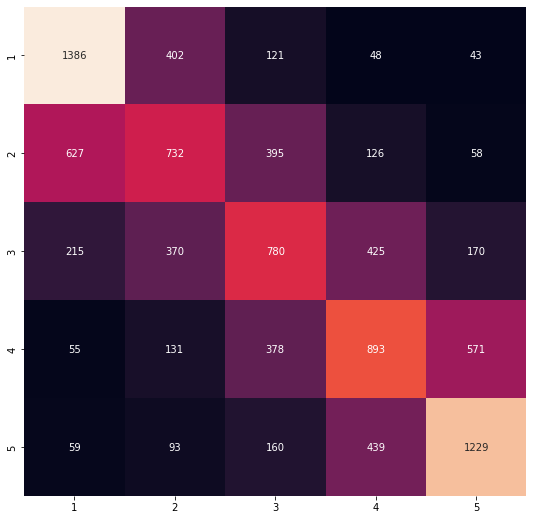

In [53]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

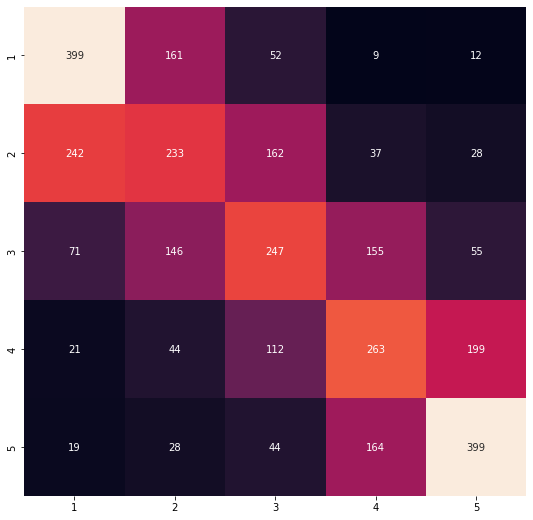

In [54]:
# Predicting the Test set results
y_predict_val = NB_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [55]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           1       0.53      0.63      0.58       633
           2       0.38      0.33      0.35       702
           3       0.40      0.37      0.38       674
           4       0.42      0.41      0.42       639
           5       0.58      0.61      0.59       654

    accuracy                           0.47      3302
   macro avg       0.46      0.47      0.46      3302
weighted avg       0.46      0.47      0.46      3302



In [56]:
import sklearn.metrics as metrics
a = 'Multinomial Naive Bayes'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
NB_scores_table = pd.DataFrame(data=d)
NB_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Multinomial Naive Bayes,0.506764,0.466687,0.040077


# Logistic Regression

# Grid Search

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.479578 using {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.477693 (0.013756) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.477760 (0.013770) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.472611 (0.015090) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.477424 (0.013824) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.477491 (0.013872) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.472880 (0.015033) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.479577 (0.015529) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.479578 (0.015520) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.474763 (0.014983) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.479003 (0.015968) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.478903 (0.015973) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.474830 (0.013527) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.454876 (0.012655) with: {

C:\Users\lenovo\anaconda3\envs\SentimentCapstone\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
#Best Model

In [59]:
LG_classifier = LogisticRegression(C=1.0, penalty='l2',solver='newton-cg')
LG_classifier.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

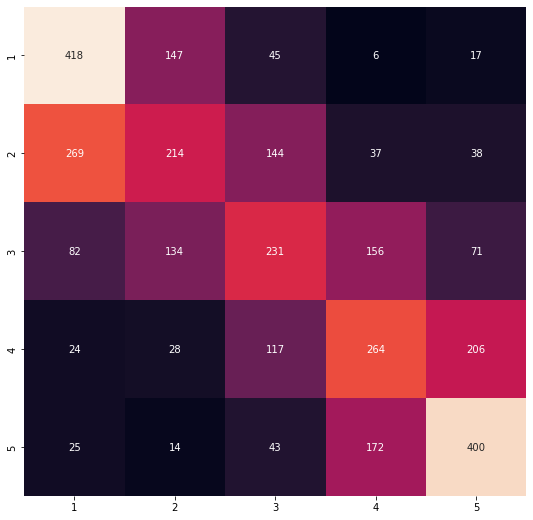

In [60]:
# Predicting the Val set results
y_predict_val = LG_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [61]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           1       0.51      0.66      0.58       633
           2       0.40      0.30      0.35       702
           3       0.40      0.34      0.37       674
           4       0.42      0.41      0.41       639
           5       0.55      0.61      0.58       654

    accuracy                           0.46      3302
   macro avg       0.45      0.47      0.46      3302
weighted avg       0.45      0.46      0.45      3302



In [62]:
a = 'Logistic Regression'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
LG_scores_table = pd.DataFrame(data=d)
LG_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,Logistic Regression,0.506764,0.462447,0.044317


# KNN

# Grid Search

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.399792 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
0.306145 (0.013309) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.306145 (0.013309) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.290969 (0.014551) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.301366 (0.016155) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.299950 (0.027235) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.312804 (0.021513) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.326130 (0.021058) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.336225 (0.017963) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.352914 (0.017826) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.355371 (0.018752) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.368898

# Best Model

In [64]:
KNN_classifier = KNeighborsClassifier(metric='euclidean', n_neighbors=19,weights='distance')
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')

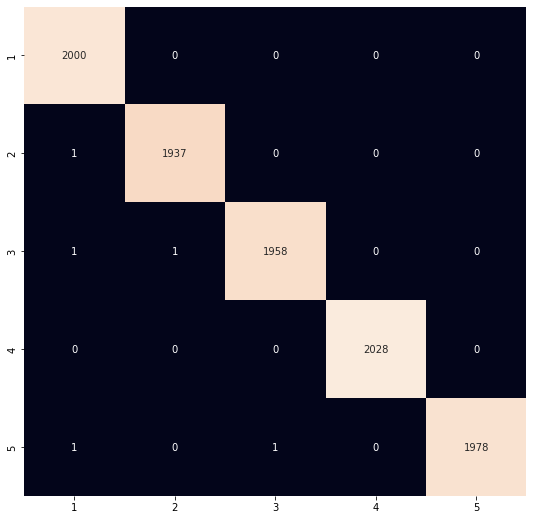

In [65]:
y_predict_train = KNN_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

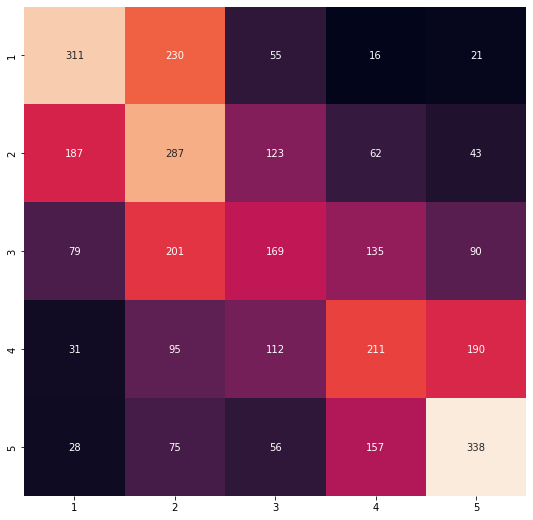

In [66]:
# Predicting the Val set results
y_predict_val = KNN_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [67]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           1       0.49      0.49      0.49       633
           2       0.32      0.41      0.36       702
           3       0.33      0.25      0.28       674
           4       0.36      0.33      0.35       639
           5       0.50      0.52      0.51       654

    accuracy                           0.40      3302
   macro avg       0.40      0.40      0.40      3302
weighted avg       0.40      0.40      0.40      3302



In [68]:
a = 'KNN'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
KNN_scores_table = pd.DataFrame(data=d)
KNN_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,KNN,0.999495,0.398546,0.600949


# Support Vector Machine

# Grid Search

In [77]:
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly']
gamma = ['scale']
degree = [2 , 3]
# define grid search
grid = dict(kernel=kernel,degree=degree,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.456761 using {'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.456761 (0.012635) with: {'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.453733 (0.013179) with: {'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [78]:
from sklearn.svm import SVC
SVM_classifier = SVC(kernel='poly',degree=2,gamma='scale')
SVM_classifier.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

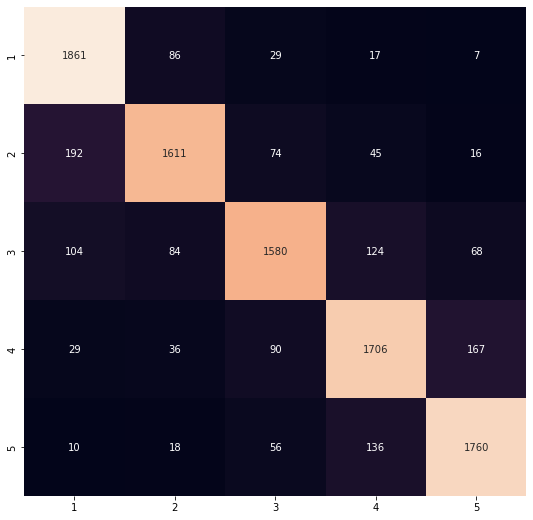

In [79]:
y_predict_train = SVM_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

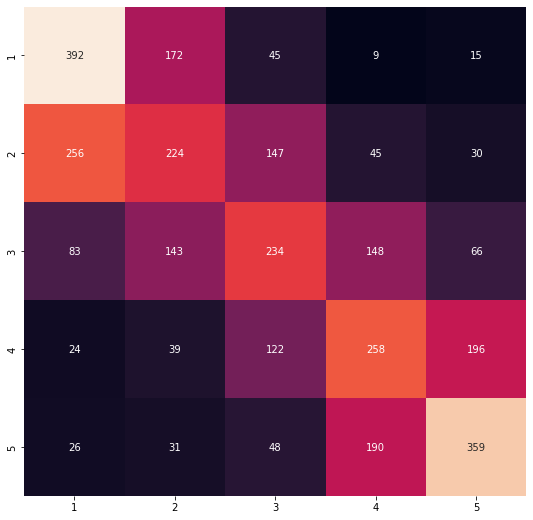

In [80]:
# Predicting the Val set results
y_predict_val = SVM_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [81]:
print(classification_report(y_val, y_predict_val))

              precision    recall  f1-score   support

           1       0.50      0.62      0.55       633
           2       0.37      0.32      0.34       702
           3       0.39      0.35      0.37       674
           4       0.40      0.40      0.40       639
           5       0.54      0.55      0.54       654

    accuracy                           0.44      3302
   macro avg       0.44      0.45      0.44      3302
weighted avg       0.44      0.44      0.44      3302



In [82]:
a = 'SVM'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
SVM_scores_table = pd.DataFrame(data=d)
SVM_scores_table

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,SVM,0.859883,0.444276,0.415607


# Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,KNN,0.999495,0.396426,0.603069
0,Multinomial Naive Bayes,0.507672,0.466081,0.041591
0,Logistic Regression,0.507672,0.464870,0.042802
0,SVM,0.987684,0.443973,0.543711
0,Random Forest,0.999495,0.457904,0.541591


In [166]:
RF_classifier = RandomForestClassifier(max_features='log2',n_estimators=1000)
RF_classifier.fit(x_train, y_train)

Best: 0.456794 using {'max_features': 'log2', 'n_estimators': 1000}
0.392961 (0.014585) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.443303 (0.015788) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.452387 (0.015290) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.382932 (0.013211) with: {'max_features': 'log2', 'n_estimators': 10}
0.442730 (0.013851) with: {'max_features': 'log2', 'n_estimators': 100}
0.456794 (0.015027) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
y_predict_train = RF_classifier.predict(x_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
conf_matrix(cm)

In [ ]:
# Predicting the Val set results
y_predict_val = RF_classifier.predict(x_val)
cm = confusion_matrix(y_val, y_predict_val)
conf_matrix(cm)

In [166]:
print(classification_report(y_val, y_predict_val))

Best: 0.456794 using {'max_features': 'log2', 'n_estimators': 1000}
0.392961 (0.014585) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.443303 (0.015788) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.452387 (0.015290) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.382932 (0.013211) with: {'max_features': 'log2', 'n_estimators': 10}
0.442730 (0.013851) with: {'max_features': 'log2', 'n_estimators': 100}
0.456794 (0.015027) with: {'max_features': 'log2', 'n_estimators': 1000}


In [166]:
a = 'Random Forest'
d = {'Model Name': [a],
             'Train Accuracy': [metrics.accuracy_score(y_train, y_predict_train)],
             'Validation Accuracy': [metrics.accuracy_score(y_val, y_predict_val)],
             'Accuracy Difference':[metrics.accuracy_score(y_train, y_predict_train)-metrics.accuracy_score(y_val, y_predict_val)]}
RF_scores_table = pd.DataFrame(data=d)
RF_scores_table

Best: 0.456794 using {'max_features': 'log2', 'n_estimators': 1000}
0.392961 (0.014585) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.443303 (0.015788) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.452387 (0.015290) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.382932 (0.013211) with: {'max_features': 'log2', 'n_estimators': 10}
0.442730 (0.013851) with: {'max_features': 'log2', 'n_estimators': 100}
0.456794 (0.015027) with: {'max_features': 'log2', 'n_estimators': 1000}


# Bagged Decision Trees

In [ ]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Stochastic Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Bring all model one DataFrame

In [74]:
all_models = pd.concat([KNN_scores_table,
                        NB_scores_table,
                        LG_scores_table,
                        SVM_scores_table,
                        RF_scores_table,
                        RC_scores_table,
                        GBC_scores_table],
                        axis=0)
all_models

,Model Name,Train Accuracy,Validation Accuracy,Accuracy Difference
0,KNN,0.999495,0.398546,0.600949
0,Multinomial Naive Bayes,0.506764,0.466687,0.040077
0,Logistic Regression,0.506764,0.462447,0.044317
0,SVM,0.497173,0.464264,0.032909
